#Introduction to neural network classification with tensorflow

In this notebook we're going to lear how to write neural networks for classification.

A classification is where you try to classify something as one thing or another

A few types of classification problems
  *Binary classification
  *Muliticlass classification
  *Multilabel  classification

  Creating Data to view and fit

In [1]:
from sklearn.datasets import make_circles
#Make 1000 examples
nsample = 1000

#Create circles
x, y = make_circles(nsample,noise=0.03,random_state=42)

In [2]:
#check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:,0], "X1":x[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

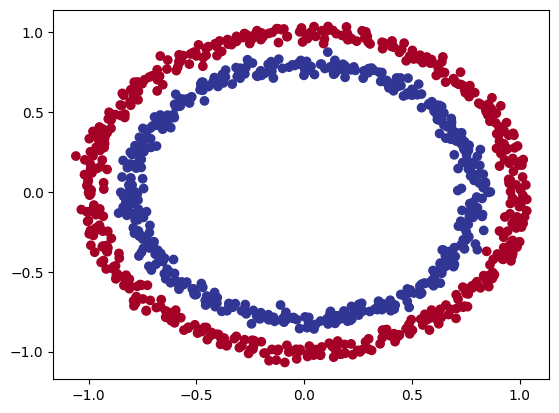

In [6]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu);

Exercise: Before pushing forward , spent 10 minutes playing around playground.tensorflow.org networks. see what happens when you change different hyperparameters

Input and Output shapes

In [7]:
#check the shapes of our features and labels
x.shape, y.shape


((1000, 2), (1000,))

In [8]:
#How may samples we're working it
x[0], [0]

(array([0.75424625, 0.23148074]), [0])

Steps in modeling

The steps in modelling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate . . . .

In [9]:
import tensorflow as tf
#set the random seed
tf.random.set_seed(42)

#1.create a model using the squential api
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#2. compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the model
model1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 1.9475 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4870


In [10]:
#lets try and improving our by training for longer
model1.fit(x, y, epochs=200, verbose=0)
model1.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on binary classsification problem and our model is getting around ~ 50% accuracy ...its performing as if it's guessing

So let's step things up a notch andd an extra layer.

In [11]:
#set the random seed
tf.random.set_seed(42)

#1.create a model, this timewith 2 layers
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
])

#2 compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3 fit model
model2.fit(x,y, epochs=100, verbose=0)
#4. Evaluate the model
model2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244457244873, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

#improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD
3. fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

In [14]:
#set the random seed
tf.random.set_seed(42)

#1. create the model (this time 3 layers)
#add dense neuron
#add another layers with 10 neurons
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. compile model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#3 fit a model
model3.fit(x,y, epochs=100, verbose=0)

#4 evaluate a model
model3.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5140


[0.6971427798271179, 0.5139999985694885]

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


from tensorflow.python.ops.array_ops import meshgrid
#to visulize our model's predictions, let's createa function 'plot_decision_boundary()', this function will:

*Take in trained model, features(x) and labels(y)

*Create a meshgrid of the different x values

*Make predictions as well as a line between zones(where each unique class falls)

In [36]:
import numpy as np

====================================================================

 Plot Decision Boundary Function

In [29]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [28]:
x[0,:]

array([0.75424625, 0.23148074])

In [21]:
#make 2 dimensions to 1 dimension x[:,0] then get the minimum .min remove the extra 0.1
#make 2 dimensions to 1 dimension x[:,0] then get the maximum .max  remove the extra 0.1
# x and y is the linear progression then you need xmin - ymin and xmin = xmax
xmin, xmax = x[:,0].min() - 0.1, x[:,0].max() + 0.1
ymin, ymax = x[:,1].min() - 0.1, x[:,1].max() + 0.1
xmin,xmax,ymin,ymax

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [38]:
def plot_decision_boundary(model, x, y):
  """
  plots the decision boundary created by a model predicting on x.
  resource  cs231n neural network case study
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://madewithml.com/courses/foundations/neural-networks/
  """
  #define the axis boundaries of the plot and create a meshgrid
  xmin, xmax = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  ymin, ymax = x[:,1].min() - 0.1, x[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(xmin, xmax,100),
                      np.linspace(ymin, ymax, 100))

  #create x value(we going to create prediction on these)
  #stack 2d array together
  xin = np.c_[xx.ravel(), yy.ravel()]

  #make predictions
  ypred = model.predict(xin)

  #check for multi-class
  if len(ypred[0])>1:
    print("doing multiclass classification")
    #We have to reshape our prediction to get them ready for plotting
    ypred = np.argmax(ypred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    ypred = np.round(ypred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, ypred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())



313/313 [==============================] - 0s 1ms/step
doing binary classification


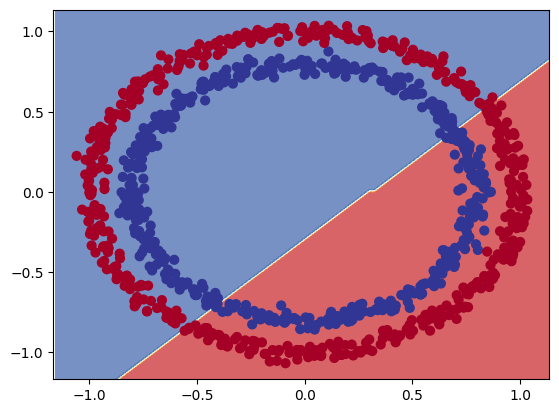

In [39]:
#Check out the predictions our model is making
plot_decision_boundary(model=model3, x=x, y=y)

In [44]:
#let's see if our model can be used for a regression problem
#regression means the line
tf.random.set_seed(42)

#Create some regression data
xregression = tf.range(0,1000,5)
yregression = tf.range(100,1100,5) #y=x+100

#split our regresssion data into training and test sets
xregtrain = xregression[:150]
xregtest = xregression[150:]
yregtrain = yregression[:150]
yregtest = yregression[150:]
#fit our model to regresssion data ~error
#model3.fit(tf.expand_dims(xregtrain,axis=-1), yregtrain, epochs=100)

Oh wait... we compiled our model for a binary classification problem
but... were now working on a regression problem. let change the model to suit our data

In [56]:
# setup random seed
tf.random.set_seed(42)

#1. create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. compile a model, this time  with a regresssion - specific loss function
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model3.fit(tf.expand_dims(xregtrain, axis=-1), yregtrain, epochs=100, verbose =0)
model3.evaluate(xregtrain, yregtrain)

5/5 [==============================] - 0s 4ms/step - loss: 38.8104 - mae: 38.8104


[38.810359954833984, 38.810359954833984]

In [55]:
yregtrain

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550,
       555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
       620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680,
       685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745,
       750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
       815, 820, 825, 830, 835, 840, 845], dtype=int32)>

In [49]:
# need this (tf.expand_dims(xregtrain, axis=-1)
#it should be one digit per dimenstion
xregtrain

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745], dtype=int32)>

2/2 [==============================] - 0s 6ms/step


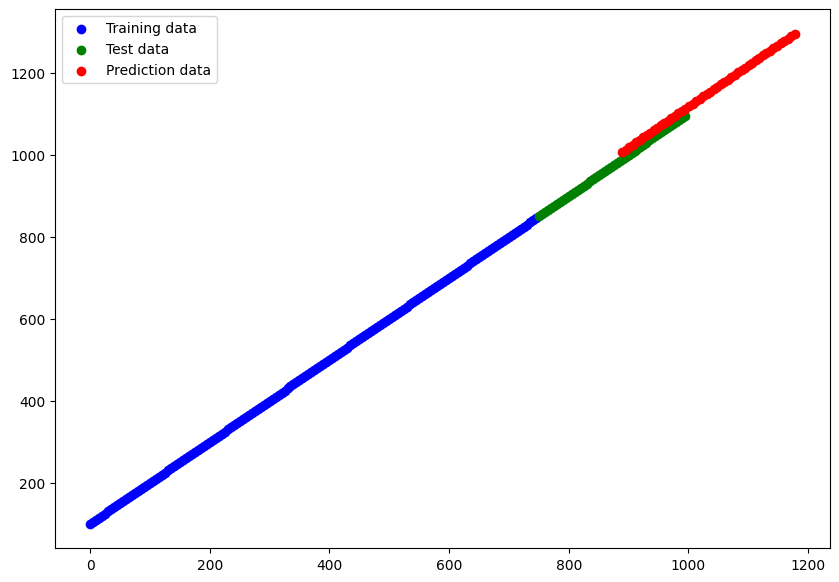

In [59]:
#make predictions with our trained model
xregpred = model3.predict(xregtest)
yregpred = model3.predict(yregtest)

#plot the model's predictions againts our regression data
plt.figure(figsize=(10,7))
plt.scatter(xregtrain, yregtrain, c="b", label="Training data")
plt.scatter(xregtest, yregtest, c="g", label="Test data")
plt.scatter(xregpred, yregpred, c="r", label="Prediction data")
plt.legend()

##The missing piece Non-linearity